In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the train dataset

In [2]:
import pandas as pd
df_train=pd.read_csv('D:/Python file/Project Datasets/FinalEval/train_agriculture.csv')  #Path location of the dataset
df_train.head()  #Checking out the top 5 rows of the dataset

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df_train.shape    #Checking the dimensions of the dataset

(4599, 10)

In [4]:
df_train.columns   #Checking out the columns of the dataset

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

# Dataset Description

Machine Learning in Agriculture:

    Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that     gives machines the ability to learn without being strictly programmed. It has emerged together with big data            technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data       intensive processes in agricultural operational environments.

     Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted  in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks   pick up the harvest determining the ripeness with the help of computer vision.
     
Description of the Dataset:

    Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest  is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use  of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

    Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than        required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for          consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been          controlled for.
    
-> This dataset has nearly 4500+ rows and 10 columns and the description of the columns are given below:

1.ID - Unique ID

2.Estimated_Insects_Count - Estimated insects count per square meter

3.Crop_Type - Category of Crop (0 and 1) 

4.Soil_Type - Category of Soil (0 and 1)

5.Pesticide_Use_Category - Type of pesticides used (1- Never, 2-Previously Used, 3-Currently Using) 

6.Number_Doses_Week - Number of doses per week

7.Number_Weeks_Used - Number of weeks used

8.Number_Weeks_Quit - Number of weeks quit

9.Season - Season category (1,2,3) 

10.Crop_Damage - Crop damage category (0-alive, 1-damage due to other causes, 2-damage due to pesticides)

# Our agenda in this project

->We need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides   or damaged by other reasons and we need to approach by using classification analysis.

->First, use the train dataset and do the EDA process, fitting the best model and saving the model.

->Then, use the test dataset and do the EDA process, load the saved model aand predict the values over the test data.

In [5]:
df_train.info()    #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [6]:
df_train.isnull().sum()   #Checking for null values in the dataset

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

There are missing values in Number_Weeks_Used column and we need to fill it.

# Exploratory Data Analysis

In [7]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

0 for alive 	 1 for damage due to other causes 	 2 for damage due to Pesticides


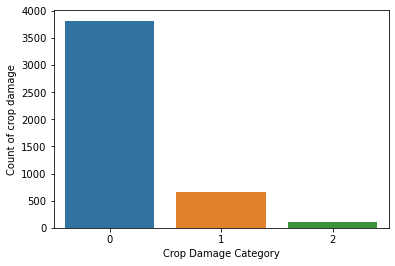

In [8]:
#Plotting countplot for Crop Damage 
print(df_train['Crop_Damage'].value_counts())
print()
print('0 for alive','\t','1 for damage due to other causes','\t','2 for damage due to Pesticides')
plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Damage',data=df_train)
plt.xlabel('Crop Damage Category')
plt.ylabel('Count of crop damage')
plt.show()

We can see that 3820 crops are alive, 664 crops are damaged due to other causes and 115 crops are damaged due to pesticides

0    3565
1    1034
Name: Crop_Type, dtype: int64


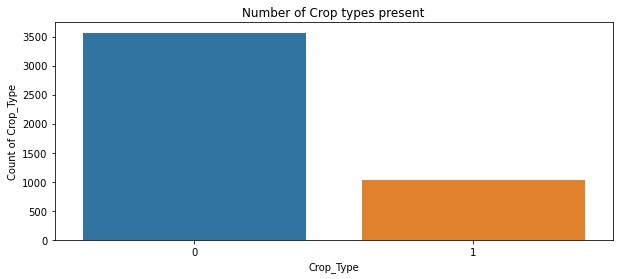

In [9]:
#Plotting for Crop_Types
print(df_train['Crop_Type'].value_counts())
plt.subplots(figsize=(10,4))
sns.countplot(x='Crop_Type',data=df_train)
plt.title('Number of Crop types present')
plt.xlabel('Crop_Type')
plt.ylabel('Count of Crop_Type')
plt.show()

There are 3565 crops of 0th type and 1034 crops of 1st type respectively.

0    2407
1    2192
Name: Soil_Type, dtype: int64


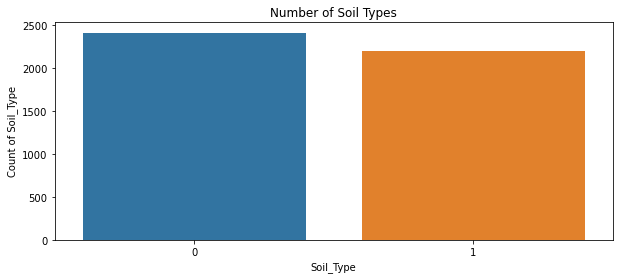

In [10]:
#Plotting for Soil Type
print(df_train['Soil_Type'].value_counts())
plt.subplots(figsize=(10,4))
sns.countplot(x='Soil_Type',data=df_train)
plt.title('Number of Soil Types')
plt.xlabel('Soil_Type')
plt.ylabel('Count of Soil_Type')
plt.show()

There are 2407 soils of 0th type and 2192 soils of 1st type respectively

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

1 for Never 	 2 for previously used 	 3 for currently using


Text(0, 0.5, 'Count of Pesticide_Use_Category')

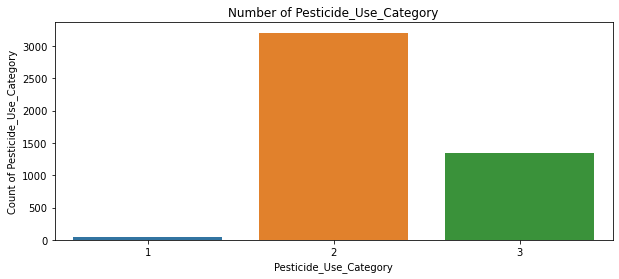

In [11]:
#Plotting for Pesticide use category
print(df_train['Pesticide_Use_Category'].value_counts())
print()
print('1 for Never','\t','2 for previously used','\t','3 for currently using')
plt.subplots(figsize=(10,4))
sns.countplot(x='Pesticide_Use_Category',data=df_train)
plt.title('Number of Pesticide_Use_Category')
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('Count of Pesticide_Use_Category')

There are 45 pesticides which has never been used, 3205 pesticides which are previously used and 1349 pesticides which are currently used

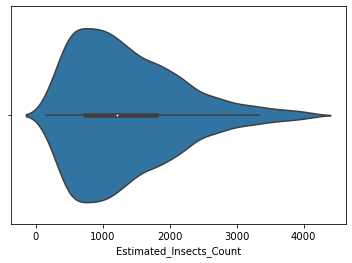

In [12]:
#Checking the distribution of Estimated insects count using violin plot
sns.violinplot(df_train['Estimated_Insects_Count'])
plt.show()

Mostly the range of estimated insects count fall between 1000-2000

1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64



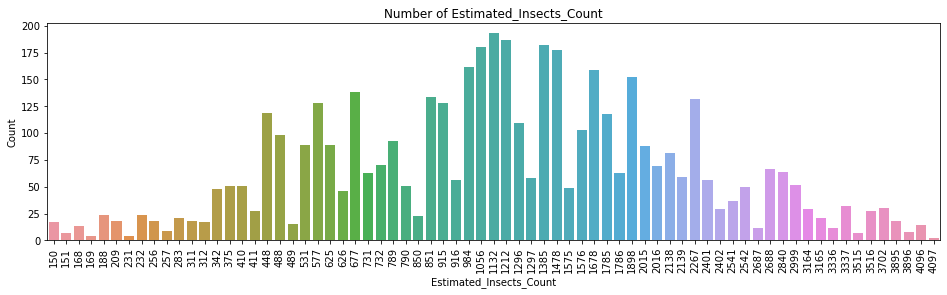

In [13]:
#Checking the number of insects count 
print(df_train['Estimated_Insects_Count'].value_counts())
print()
plt.subplots(figsize=(16,4))
sns.countplot(x='Estimated_Insects_Count',data=df_train)
plt.title('Number of Estimated_Insects_Count')
plt.xlabel('Estimated_Insects_Count')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

We can see that 1132 is the maximum insects count whereas 2 is the minimum insects count 

# Bivariate Analysis

Season  Crop_Damage
1       0              1150
        1               192
        2                37
2       0              1908
        1               358
        2                61
3       0               762
        1               114
        2                17
Name: Crop_Damage, dtype: int64 



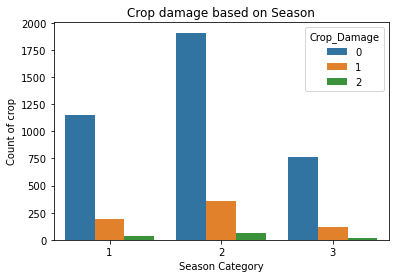

In [14]:
#Countplot for checking crop damage based on season
print(df_train.groupby('Season')['Crop_Damage'].value_counts(),"\n")
sns.countplot(x='Season',hue='Crop_Damage',data=df_train)
plt.title('Crop damage based on Season')
plt.xlabel('Season Category')
plt.ylabel('Count of crop')
plt.show()

-> Season 2 has the less damage among all seasons as pesticides were not used on 1908 crops and less number of crops that were      damaged due to pesticides are on 3rd season with 17 crops damaged.

-> More damage on crops due to other reasons are in Season 2 with 358 crops.

Soil_Type  Crop_Damage
0          0              1947
           1               390
           2                70
1          0              1873
           1               274
           2                45
Name: Crop_Damage, dtype: int64 



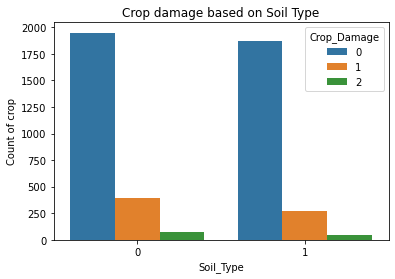

In [15]:
#Checking soil type based on crop damage
print(df_train.groupby('Soil_Type')['Crop_Damage'].value_counts(),"\n")
sns.countplot(x='Soil_Type',hue='Crop_Damage',data=df_train)
plt.title('Crop damage based on Soil Type')
plt.xlabel('Soil_Type')
plt.ylabel('Count of crop')
plt.show()

Maximum damage of crops are in 0th type of soil with 70 crops due to pesticides and they also have the most alive crops with 1947.

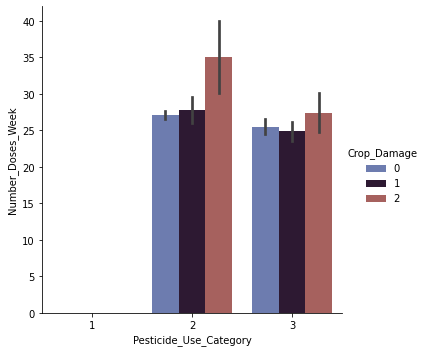

In [16]:
#Plotting Pesticide use category vs Number doses week on the basis of crop damage using factorplot
sns.factorplot(x='Pesticide_Use_Category',y='Number_Doses_Week',hue='Crop_Damage',palette='twilight',data=df_train,kind='bar')

Observations:

1.We can observe that if we are not using any pesicides, there is no crop damage at all. 

2.If we are using previously used pesticides, the damage is more as the doses of pesticides per week is increased.

3.For currently using pesticides, if we increase the dose as 28 doses per week, we can observe the crop damage is high.

4.Overall if the doses are 25 per week, the damage due to pesticides is out of the picture and this means that 25 dose of         pesticides per week is good for crops.

Crop_Type  Crop_Damage
0          0              2979
           1               498
           2                88
1          0               841
           1               166
           2                27
Name: Crop_Damage, dtype: int64


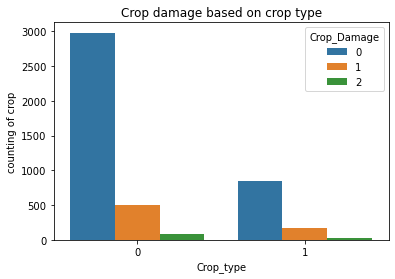

In [17]:
#Checking for Crop type based on crop damage
print(df_train.groupby('Crop_Type')['Crop_Damage'].value_counts())
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=df_train)
plt.title('Crop damage based on crop type')
plt.xlabel('Crop_type')
plt.ylabel('counting of crop')
plt.show()

-> 0th type of crop is having less damage due to pesticides which is 88 and having more damage due to other causes which is 498,    and we also observed that the crop that has never been damaged is of count 3945.

-> 1st type of crop that has never been damaged is of count 1074 and damaged due other causes is of count 166, and damaged due      to pesticides is of count 27.

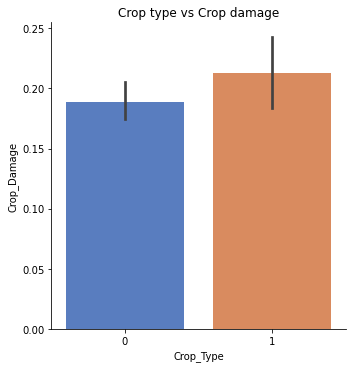

In [18]:
#Plotting factorplot between crop_type vs crop_damage
sns.factorplot(x='Crop_Type',y='Crop_Damage',data=df_train,kind='bar',palette='muted',size=5,aspect=1)
plt.title('Crop type vs Crop damage')
plt.show()

1st crop type has more damage than 0th crop type overall

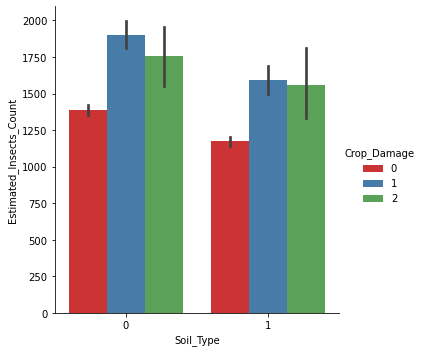

In [19]:
#Plotting factorplot between Soil Type vs Estimated Insects count on crop damage basis
sns.factorplot(x='Soil_Type',y='Estimated_Insects_Count',hue='Crop_Damage',palette='Set1',data=df_train,kind='bar')

-> From observing soil type 0, we can see that the crop damage due to other causes which is with estimated insects count of        1900, and the insects count is 1750 for the damage caused due to pesticides.

-> From observing soil type 1, we can see that the crop damage due to other causes which is with estimated insects count of        1700, and the insects count is 1650 for the damage caused due to pesticides.

# Multivariate Analysis

In [20]:
df_train.describe()    #Statistical summary of the dataset

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observations:

1.The min values is 0 for all columns except Estimated_Insects_Count.

2.The difference between the mean and median values is very less.

3.The difference between 75th percentile and max value is large and it is due to the presence of outliers.

In [21]:
#Checking correlation of the dataset
corr=df_train.corr()  #corr() function provides the correlation value of each column
corr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


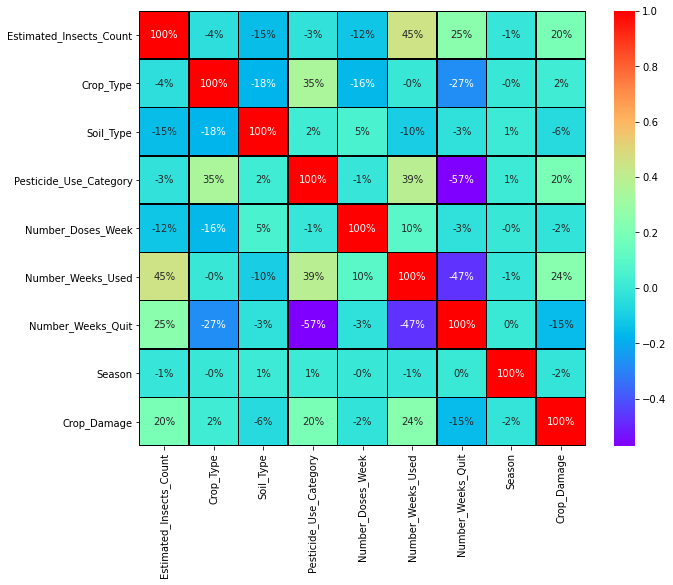

In [22]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

Observations:

1.Mostly there are negative correlated values present.

2.Highest positive correlated column is Number_Weeks_Used along with Estimated_Insects_Count which is of 45%

3.Highest negative correlated columns is Number_Weeks_Quit along with Pesticide_Use_Category which is of -57%

4.Positively correlated columns have high impact with the target variable and negatively correlated columns have less impact or   zero impact with the target variable.

In [23]:
#As ID is not much important, we can drop from the dataset
df_train.drop('ID',axis=1,inplace=True)

# Handling missing values

In [24]:
df_train.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

As Number_Weeks_Used have missing values, we can replace them by using SimpleImputer Library

In [25]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(strategy='mean')  #Finding the mean value and replacing it with the missing values
df_train['Number_Weeks_Used']=SI.fit_transform(df_train['Number_Weeks_Used'].values.reshape(-1,1)) 
# reshape is just to neglect any error value

In [26]:
df_train.isnull().sum()   #Checking null values after replacing

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

There are no null values present in the dataset after handling it using SimpleImputer and we used the mean value of the column and replaced it with missing values.

# Checking skewness

In [27]:
df_train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

Except Soil_Type, Season and Number_Weeks_Used, all the columns have quite high positive skewness

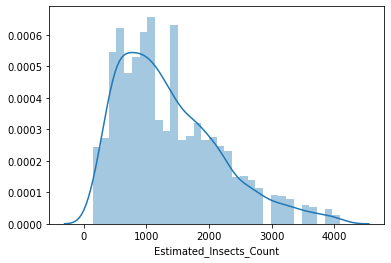

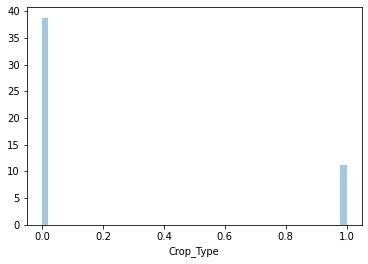

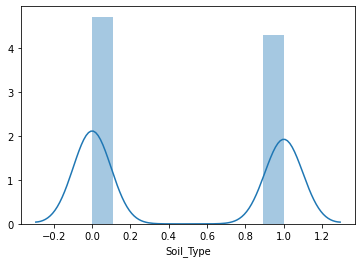

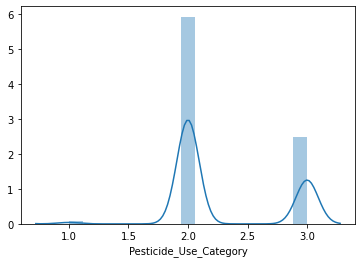

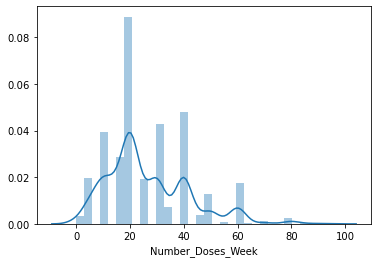

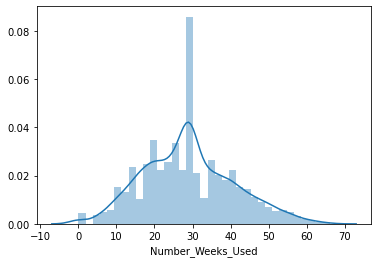

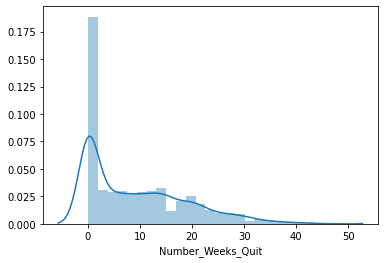

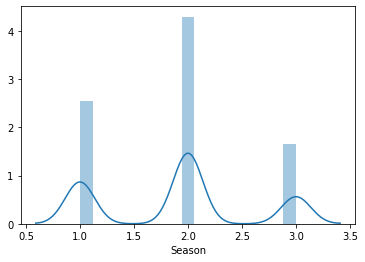

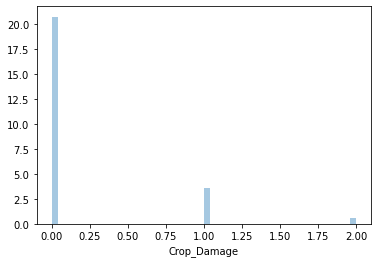

In [28]:
#Plotting distplot for checking the distribution of skewness
for col in df_train.describe().columns:
    sns.distplot(df_train[col])
    plt.show()

Most of the data is not normally distributed and it is due to the presence of outliers.

# Checking outliers

We can check outliers by plotting boxplot

In [29]:
collist=df_train.columns.values 
ncol=10
nrows=10

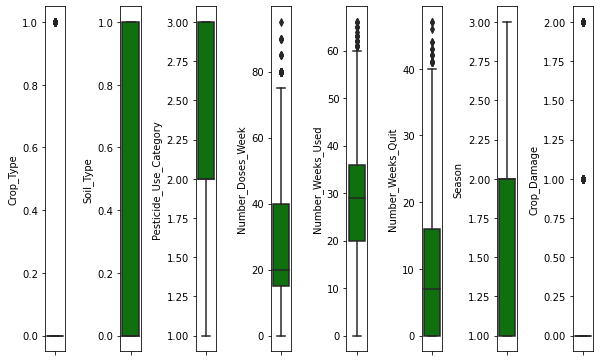

In [30]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_train[collist[i]],color='green',orient='v')
    plt.tight_layout()

As we can see, there are outliers present in this dataset and we can handle them by using z-score

# Handling outliers by using z-score method

In [31]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_train))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
         167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
         264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
         374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
         557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
         819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
        1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
        1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
        1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
        2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
        2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
        2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
        2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
        2814, 2828, 2829, 2834, 2841, 

In [32]:
#Removing outliers
df_newtrain=df_train[(z<3).all(axis=1)]
df_newtrain

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.000000,0,1,0
1,209,1,0,1,0,0.000000,0,2,1
2,257,1,0,1,0,0.000000,0,2,1
3,257,1,1,1,0,0.000000,0,2,1
4,342,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.891027,1,1,1
4595,2139,0,1,2,30,47.000000,2,1,1
4596,2267,0,1,2,10,7.000000,27,2,0
4597,2267,0,1,2,10,20.000000,24,2,0


In [33]:
df_train.shape   #Original dataset dimensions

(4599, 9)

In [34]:
df_newtrain.shape    #New dataset dimensions

(4370, 9)

Nearly 200+ rows had outliers and they have been removed by using z-score method

# Percentage loss of data after removal of outliers

In [35]:
percentage_loss=((229)/4599)*100   #229 = 4599-4370
print(percentage_loss)

4.979343335507719


Nearly 5% of the data has lost due to outliers which is not a big loss

# Preparing dataset for model training

We need to split independent and dependent variables from the dataset in order to perform further analysis

In [36]:
df_x=df_newtrain.drop('Crop_Damage',axis=1)   #Independent variables
y=df_newtrain['Crop_Damage']    #Dependent or Target Variable

In [37]:
#Checking x data
df_x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2


In [38]:
#Checking y data after splitting
y

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4370, dtype: int64

# Treating skewness 

In [39]:
#We are treating skewness by using square root transform
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])

In [40]:
df_x.skew()   #Checking skewness after treating it

Estimated_Insects_Count    0.179172
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.588515
Number_Doses_Week         -0.097393
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.006921
Season                     0.141605
dtype: float64

We can see that the skewness has been treated and now we can proceed further analysis

# Scaling the data

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [41]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-1.996164,1.848947,-0.960945,-3.335467,-3.292351,-2.445679,-1.237252,-1.288559
1,-1.925536,1.848947,-0.960945,-3.335467,-3.292351,-2.445679,-1.237252,0.147555
2,-1.776386,1.848947,-0.960945,-3.335467,-3.292351,-2.445679,-1.237252,0.147555
3,-1.776386,1.848947,1.040642,-3.335467,-3.292351,-2.445679,-1.237252,0.147555
4,-1.543144,1.848947,-0.960945,-3.335467,-3.292351,-2.445679,-1.237252,0.147555
...,...,...,...,...,...,...,...,...
4365,1.085323,-0.540848,1.040642,-0.578928,-0.271717,0.023356,-0.711863,-1.288559
4366,1.086347,-0.540848,1.040642,-0.578928,0.407155,1.570954,-0.494240,-1.288559
4367,1.215538,-0.540848,1.040642,-0.578928,-1.156440,-1.847457,1.492749,0.147555
4368,1.215538,-0.540848,1.040642,-0.578928,-1.156440,-0.736473,1.336618,0.147555


# Building the model

In [42]:
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
from sklearn.metrics import accuracy_score

In [43]:
#Finding the best random state and accuracy
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
        print('At random state',i,',the model performs well')
        print('Training accuracy_score is: ',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy_score is: ',accuracy_score(y_test,pred_test)*100)

At random state 56 ,the model performs well
Training accuracy_score is:  84.89702517162472
Testing accuracy_score is:  84.89702517162472
At random state 357 ,the model performs well
Training accuracy_score is:  84.89702517162472
Testing accuracy_score is:  84.89702517162472
At random state 471 ,the model performs well
Training accuracy_score is:  85.01144164759725
Testing accuracy_score is:  85.01144164759725
At random state 490 ,the model performs well
Training accuracy_score is:  84.89702517162472
Testing accuracy_score is:  84.89702517162472
At random state 668 ,the model performs well
Training accuracy_score is:  84.89702517162472
Testing accuracy_score is:  84.89702517162472
At random state 725 ,the model performs well
Training accuracy_score is:  84.78260869565217
Testing accuracy_score is:  84.78260869565217
At random state 738 ,the model performs well
Training accuracy_score is:  84.78260869565217
Testing accuracy_score is:  84.78260869565217
At random state 864 ,the model perf

We can see that at random_state=471 the maximum scores are obtained so that we can create our train_test_split with that

In [44]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=471,test_size=.20,stratify=y)

# Finding out the best model

We are going to use LogisticRegression, SVC, GaussianNB, DecisionTreeClassifier and KNeighborsClassifier algorithms for finding out the best model among those

In [45]:
#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [46]:
#Initializing the instance of the model
LR=LogisticRegression()
svc=SVC()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

In [47]:
models= []
models.append(('Logistic Regression',LR))
models.append(('SupportVectorClassifier',svc))
models.append(('GaussianNB',gnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))

In [48]:
#Importing required modules and metrices
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.8478260869565217


cross_val_score:  0.8434782608695652


roc_auc_score:  0.5193008545576407


Classification report:
 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       746
           1       0.37      0.05      0.10       128

    accuracy                           0.85       874
   macro avg       0.61      0.52      0.51       874
weighted avg       0.79      0.85      0.80       874



Confusion matrix: 

[[734  12]
 [121   7]]


AUC_ROC curve:



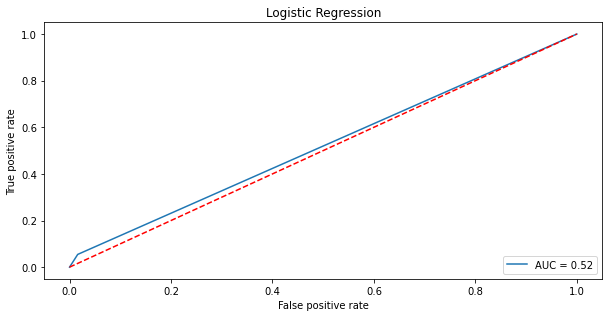





****************************** SupportVectorClassifier ***************************


SVC()


accuracy_score:  0.8592677345537757


cross_val_score:  0.8521739130434783


roc_auc_score:  0.5454193197050938


Classification report:
 
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       746
           1       0.62      0.10      0.17       128

    accuracy                           0.86       874
   macro avg       0.74      0.55      0.55       874
weighted avg       0.83      0.86      0.81       874



Confusion matrix: 

[[738   8]
 [115  13]]


AUC_ROC curve:



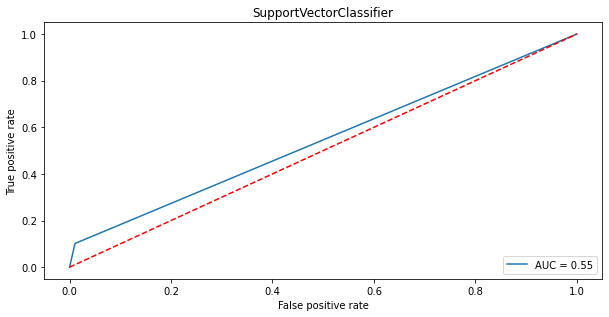





****************************** GaussianNB ***************************


GaussianNB()


accuracy_score:  0.8352402745995423


cross_val_score:  0.7881006864988558


roc_auc_score:  0.6316605227882037


Classification report:
 
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       746
           1       0.42      0.34      0.38       128

    accuracy                           0.84       874
   macro avg       0.66      0.63      0.64       874
weighted avg       0.82      0.84      0.83       874



Confusion matrix: 

[[686  60]
 [ 84  44]]


AUC_ROC curve:



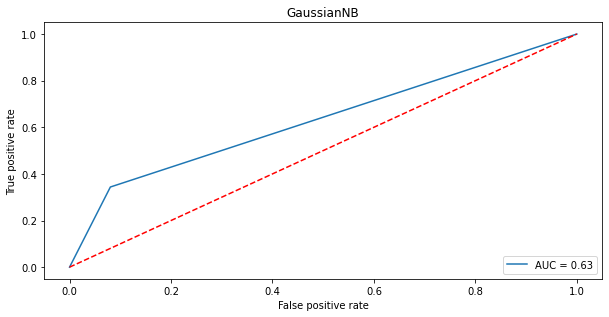





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.7665903890160183


cross_val_score:  0.7521739130434782


roc_auc_score:  0.5655579758713136


Classification report:
 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       746
           1       0.24      0.28      0.26       128

    accuracy                           0.77       874
   macro avg       0.56      0.57      0.56       874
weighted avg       0.78      0.77      0.77       874



Confusion matrix: 

[[634 112]
 [ 92  36]]


AUC_ROC curve:



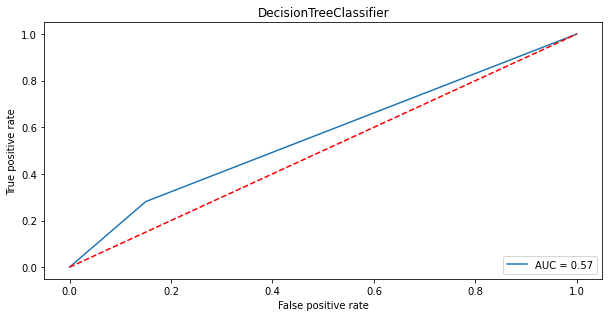





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.8329519450800915


cross_val_score:  0.8189931350114416


roc_auc_score:  0.5753078920911529


Classification report:
 
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       746
           1       0.38      0.21      0.27       128

    accuracy                           0.83       874
   macro avg       0.62      0.58      0.59       874
weighted avg       0.80      0.83      0.81       874



Confusion matrix: 

[[701  45]
 [101  27]]


AUC_ROC curve:



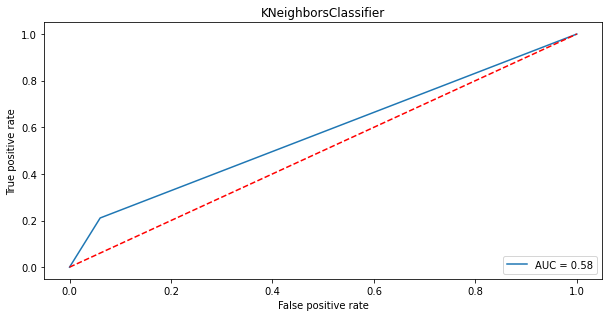

In [49]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [50]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,roc_auc_score
0,Logistic Regression,84.782609,84.347826,51.930085
1,SupportVectorClassifier,85.926773,85.217391,54.541932
2,GaussianNB,83.524027,78.810069,63.166052
3,DecisionTreeClassifier,76.659039,75.217391,56.555798
4,KNeighborsClassifier,83.295195,81.899314,57.530789


We can see that SupportVectorClassifier algorithm is working well as it is giving an accuracy score of 85.92 and cross_val_score of 85.21. Now lets try HyperparameterTuning for finding out the best parameters and increasing the scores respectively.

# Hyperparameter Tuning

In [51]:
#Creating parameter list to pass in GridSearchCV
parameters={'C':[10, 1, 0.1, 0.01,0.001],'kernel':['poly','rbf','linear'],'gamma':['scale','auto']}

In [52]:
#Using GridSearchCV to run the parameters and checking final accuracy
from sklearn.model_selection import GridSearchCV
svc=SVC()
grid=GridSearchCV(svc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.8604136521561415


In [53]:
#Using the best parameters obtained 
svc=SVC(C=1,gamma='scale',kernel='rbf',random_state=471)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Final Accuracy after tuning is: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()*100)

Final Accuracy after tuning is:  85.92677345537757
Cross validation score:  85.21739130434783


We can see that after finding out the best parameters also our scores are not increased. Now we will use Ensemble Techniques to improve the scores 

# Ensemble Techniques for boosting our score

In [54]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=471)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000,1200],'criterion' :['gini', 'entropy']}
grid=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'entropy', 'n_estimators': 500}
0.8515430206417332


In [55]:
#Using the best parameters obtained
RF=RandomForestClassifier(random_state=471,criterion='entropy',n_estimators=500)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  83.7528604118993
Cross validation score:  83.82151029748283
Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       746
           1       0.38      0.16      0.23       128

    accuracy                           0.84       874
   macro avg       0.62      0.56      0.57       874
weighted avg       0.80      0.84      0.81       874

Confusion matrix: 

[[711  35]
 [107  21]]


In [56]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(random_state=471)   #Using the best random state we obtained
parameters={'n_estimators':[50,100,500,1000],'learning_rate':[0.001,0.01,0.1,1]}
grid=GridSearchCV(adc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 1, 'n_estimators': 50}
0.8604136521561415


In [57]:
#Using the best parameters obtained
adc=AdaBoostClassifier(random_state=471,n_estimators=50,learning_rate=1)
adc.fit(x_train,y_train)
pred=adc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(adc,x,y,cv=5,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  85.24027459954233
Cross validation score:  85.35469107551489
Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       746
           1       0.49      0.16      0.24       128

    accuracy                           0.85       874
   macro avg       0.68      0.56      0.58       874
weighted avg       0.81      0.85      0.82       874

Confusion matrix: 

[[725  21]
 [108  20]]


In [58]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=471)   #Using the best random state we obtained
parameters={'n_estimators':[50,100,500,1000],'learning_rate':[0.001,0.01,0.1,1],'loss':['deviance','exponential']}
gbc=GridSearchCV(gbc,parameters,cv=5,scoring='accuracy')
gbc.fit(x_train,y_train)
print(gbc.best_params_)     #Printing the best parameters obtained
print(gbc.best_score_)      #Mean cross-validated score of best_estimator

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 50}
0.8612699775189047


In [59]:
#Using the best parameters obtained
gbc=GradientBoostingClassifier(random_state=471,n_estimators=50,learning_rate=0.1,loss='deviance')
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbc,x,y,cv=5,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  85.24027459954233
Cross validation score:  85.12585812356981
Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       746
           1       0.49      0.14      0.22       128

    accuracy                           0.85       874
   macro avg       0.68      0.56      0.57       874
weighted avg       0.81      0.85      0.82       874

Confusion matrix: 

[[727  19]
 [110  18]]


After using all the necessary techniques to finding the best parameter and improving the scores, we conclude that SupportVectorClassifier is the best algorithm among all other algorithms as it gives an accuracy score of 85.92 and cross validation score of 85.21, which is good and now we will finalize the model.

# Finalizing the model 

In [60]:
svc_prediction=svc.predict(x)
print('Predictions of SVC: ',svc_prediction)   #Printing the predicted values

Predictions of SVC:  [1 1 1 ... 0 0 0]


In [61]:
#Saving the model
import pickle
filename='Agriculture_Project.pkl'   #Specifying the filename
pickle.dump(svc,open(filename,'wb'))   

# Saving the predicted values

In [62]:
train_results=pd.DataFrame(svc_prediction)
train_results.to_csv('Agriculture_Project_TrainDataResults.csv')

Now, we have saved the model which has the predictions of the training data we had used. Next, we will use the test data and find the predictions using the trained data we have

# Using the test dataset

In [63]:
df_test=pd.read_csv('D:/Python file/Project Datasets/FinalEval/test_agriculture.csv')  #Path location of the dataset
df_test.head()  #Checking out the top 5 rows of the dataset

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [64]:
df_test.shape   #Checking out the dimensions of the dataset

(1199, 9)

There are 1199 rows and 9 columns in the test dataset

In [65]:
df_test.isnull().sum()    #Checking for missing values

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

There are missing values in the Number_Weeks_Used column and we need to fill it

# Exploratory Data Analysis

# Univariate Analysis

0    966
1    233
Name: Crop_Type, dtype: int64


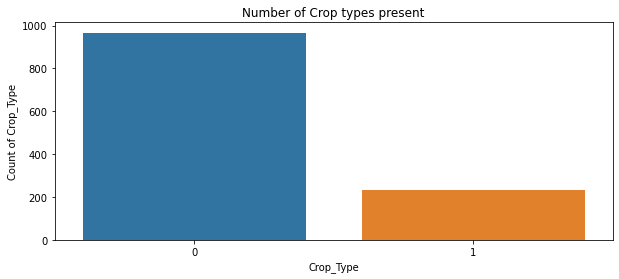

In [66]:
#Plotting for Crop Types
print(df_test['Crop_Type'].value_counts())
plt.subplots(figsize=(10,4))
sns.countplot(x='Crop_Type',data=df_test)
plt.title('Number of Crop types present')
plt.xlabel('Crop_Type')
plt.ylabel('Count of Crop_Type')
plt.show()

There are more 0th type of crops present and its count is 966, whereas 1st type of crops count is 233

0    653
1    546
Name: Soil_Type, dtype: int64


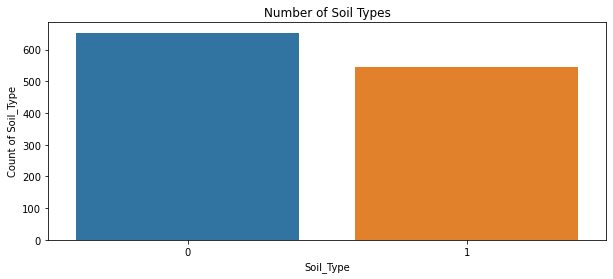

In [67]:
#Plotting for Soil Type
print(df_test['Soil_Type'].value_counts())
plt.subplots(figsize=(10,4))
sns.countplot(x='Soil_Type',data=df_test)
plt.title('Number of Soil Types')
plt.xlabel('Soil_Type')
plt.ylabel('Count of Soil_Type')
plt.show()

There are 653 crops which has 0th type of soil whereas there are 546 crops of 1st type soil

2    695
3    482
1     22
Name: Pesticide_Use_Category, dtype: int64

1 for Never 	 2 for previously used 	 3 for currently using


Text(0, 0.5, 'Count of Pesticide_Use_Category')

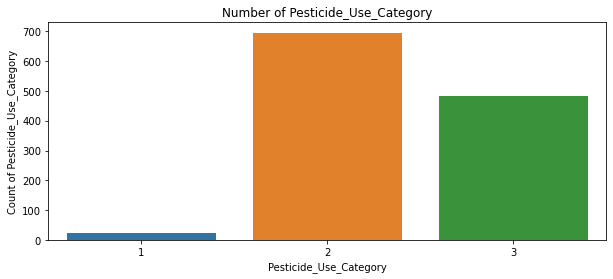

In [68]:
#Plotting for pesticide use category
print(df_test['Pesticide_Use_Category'].value_counts())
print()
print('1 for Never','\t','2 for previously used','\t','3 for currently using')
plt.subplots(figsize=(10,4))
sns.countplot(x='Pesticide_Use_Category',data=df_test)
plt.title('Number of Pesticide_Use_Category')
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('Count of Pesticide_Use_Category')

Pesticides have never been used on 22 crops, Pesticides have been used on 695 crops previously and currently the pesticides have been used on 482 crops

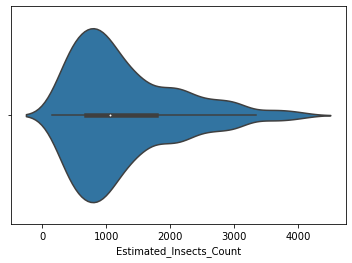

In [69]:
#Checking the distribution of Estimated insects count using violin plot
sns.violinplot(df_test['Estimated_Insects_Count'])
plt.show()

# Bivariate Analysis

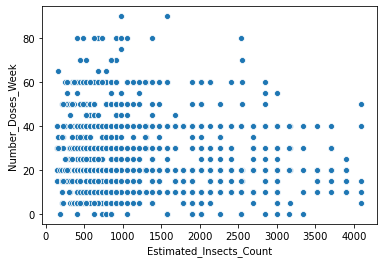

In [70]:
#Scatter plot between 2 variables
sns.scatterplot(x='Estimated_Insects_Count',y='Number_Doses_Week',data=df_test)

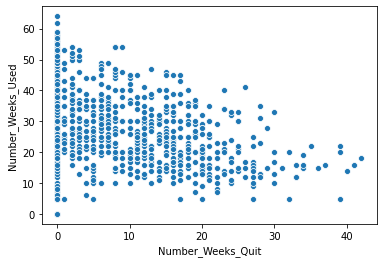

In [71]:
sns.scatterplot(x='Number_Weeks_Quit',y='Number_Weeks_Used',data=df_test)

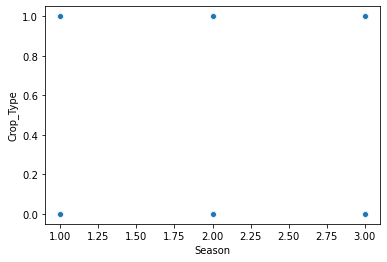

In [72]:
sns.scatterplot(x='Season',y='Crop_Type',data=df_test)

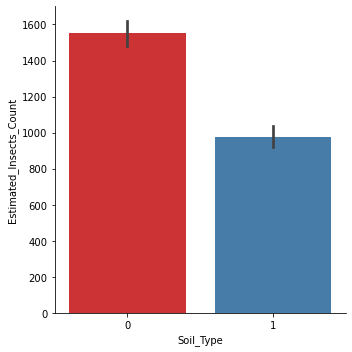

In [73]:
#Plotting factorplot between Soil Type vs Estimated Insects count
sns.factorplot(x='Soil_Type',y='Estimated_Insects_Count',palette='Set1',data=df_test,kind='bar')

0th Type of soil has an insect count of nearly 1500 whereas 1st type of soil has an insect count of nearly 900 respectively

# Multivariate Analysis

In [74]:
df_test.describe()    #Statistical summary of the dataset

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


Observations:

1.The min value for all the columns are 0, except Estimated_Insects_Count.

2.The difference between the mean and median is very less.

3.There is a large difference between 75th percentile and max value and it is due to the presence of outliers.

In [75]:
#Checking correlation of the dataset
corr=df_test.corr()  #corr() function provides the correlation value of each column
corr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,0.020773,-0.339516,0.038259,-0.121168,0.521308,0.146441,0.023384
Crop_Type,0.020773,1.000000,0.063050,0.482378,-0.170014,0.065865,-0.390935,0.020282
Soil_Type,-0.339516,0.063050,1.000000,0.129857,0.057118,-0.146997,-0.191989,-0.069242
Pesticide_Use_Category,0.038259,0.482378,0.129857,1.000000,-0.010922,0.430351,-0.584312,0.015085
Number_Doses_Week,-0.121168,-0.170014,0.057118,-0.010922,1.000000,0.129941,0.009077,0.027197
Number_Weeks_Used,0.521308,0.065865,-0.146997,0.430351,0.129941,1.000000,-0.380721,0.019353
Number_Weeks_Quit,0.146441,-0.390935,-0.191989,-0.584312,0.009077,-0.380721,1.000000,0.030281
Season,0.023384,0.020282,-0.069242,0.015085,0.027197,0.019353,0.030281,1.000000


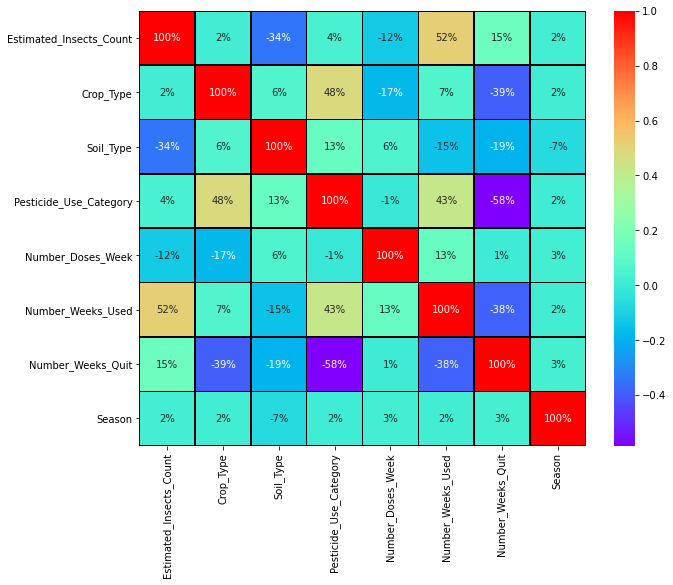

In [76]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

Observations:

1.There are more positive correlations present.

2.The most positively correlated column is Number_Weeks_Used with Estimated_Insects_Count with a value of 52%

3.The most negatively correlated column is Number_Weeks_Quit with Pesticide_Use_Category with a value of -58%

In [77]:
#As ID is not much important, we can drop from the dataset
df_test.drop('ID',axis=1,inplace=True)

# Handling missing values

In [78]:
df_test.isnull().sum()    #Checking for missing values

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

We can fill missing values by using SimpleImputer Library

In [79]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(strategy='mean')  #Finding the mean value and replacing it with the missing values
df_test['Number_Weeks_Used']=SI.fit_transform(df_test['Number_Weeks_Used'].values.reshape(-1,1)) 
#reshape is just to neglect any error value

In [80]:
df_test.isnull().sum()   #Checking null values after replacing

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

As we can see there are no missing values in the dataset after filling them with the mean value of the column

# Checking skewness

In [81]:
df_test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

There are more positive skewness present in the data

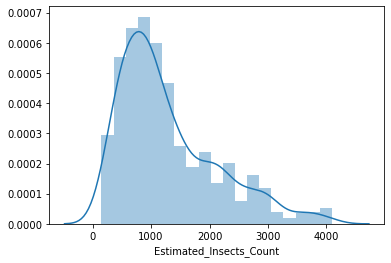

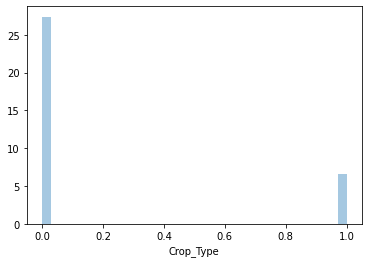

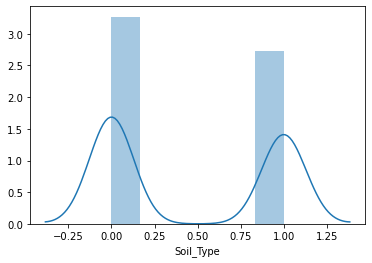

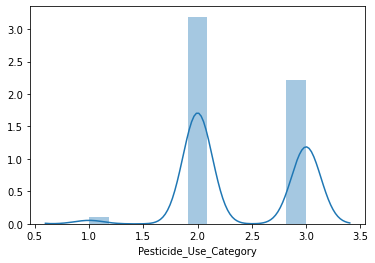

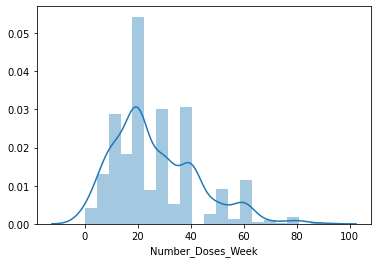

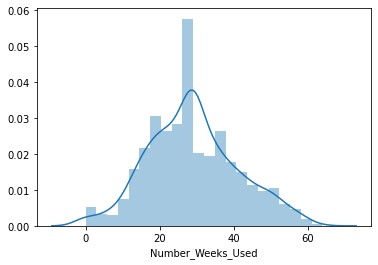

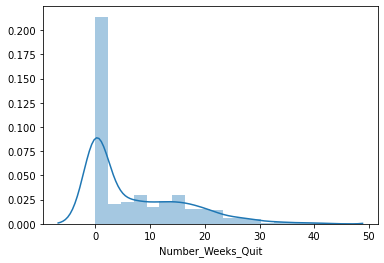

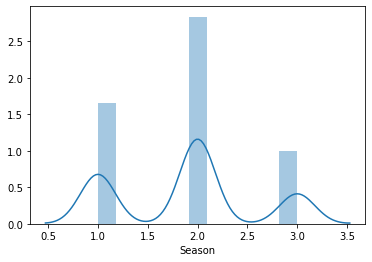

In [82]:
#Plotting distplot for checking the distribution of skewness
for col in df_test.describe().columns:
    sns.distplot(df_test[col])
    plt.show()

Some of the columns are not normally distributed and it is due to the presence of outliers

# Checking outliers

We can check the presence of outliers by plotting boxplot

In [83]:
collist=df_test.columns.values 
ncol=10
nrows=10

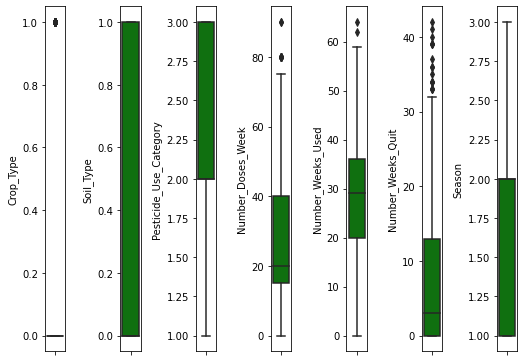

In [84]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_test[collist[i]],color='green',orient='v')
    plt.tight_layout()

As there are outliers present in the dataset, we can handle them by using z-score

# Handling outliers by using z-score method

In [85]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_test))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([  50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
         503,  535,  574,  613,  630,  751,  775,  827,  829,  853,  868,
         870,  871,  883,  890,  895,  897,  902,  904,  910,  911,  912,
         913,  914,  915,  916, 1030, 1152], dtype=int64),
 array([4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 4, 4], dtype=int64))

In [86]:
#Removing outliers
df_newtest=df_test[(z<3).all(axis=1)]
df_newtest

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,29.033333,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.000000,7,3
1195,1132,0,1,2,40,25.000000,3,1
1196,1132,0,1,2,20,13.000000,23,1
1197,1212,0,1,2,10,35.000000,5,1


In [87]:
df_test.shape   #Original dataset dimensions

(1199, 8)

In [88]:
df_newtest.shape   #New dataset dimensions

(1160, 8)

39 rows had outliers and they are removed by using z-score method

# Percentage loss of data after removal of outliers

In [89]:
percentage_loss=((39)/1199)*100   #39 = 1199-1160
print(percentage_loss)

3.252710592160134


Nearly 3.25% of data has been lost due to the removal of outliers

# Treating skewness

In [90]:
#We are treating skewness by using square root transform
for col in df_newtest.skew().index:
    if col in df_newtest.describe().columns:
        if df_newtest[col].skew()>0.55:
            df_newtest[col]=np.sqrt(df_newtest[col])

In [91]:
df_newtest.skew()   #Checking skewness after treating it

Estimated_Insects_Count    0.420464
Crop_Type                  1.515496
Soil_Type                  0.148878
Pesticide_Use_Category     0.069452
Number_Doses_Week         -0.295774
Number_Weeks_Used          0.223826
Number_Weeks_Quit          0.362977
Season                     0.159728
dtype: float64

The skewness present in the data has been treated and now we can proceed further with the predictions of test data we have

# Loading the saved best model 

In [92]:
fitted_model=pickle.load(open('Agriculture_Project.pkl','rb'))

In [93]:
fitted_model   #Checking the model we have saved

SVC(C=1, random_state=471)

We can see that SVC algorithm, which was finalized and saved after we found that it was the best model performing, is loaded and it is also showing the best parameters we obtained while doing Hyperparameter Tuning.

# Predictions over test data

In [94]:
test_predictions=fitted_model.predict(df_newtest)   #Predicting the values

In [95]:
#Checking the predictions
test_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

We have predicted the values over the test data and now we will save the predicted values separately

# Saving the predicted values

In [96]:
test_results=pd.DataFrame(test_predictions)
test_results.to_csv('Agriculture_Project_TestDataResults.csv')

# Conclusion

-> After getting an insight of this agriculture dataset, we can say that the damage of the crops can be reduced and also we        found that the pesticides were not used in most of the crops.

-> First we loaded the train dataset and did the EDA process and other pre-processing techniques like skewness check and            removal, handling the outliers present, filling the missing data, visualizing the distribution of data,etc.

-> From the data visualization, we got that 0th type of Crop has more damage that 1st type, the pesticides were not used on most    of the crops and also more number of crops are alive.

-> Then we did the model training, building the model and finding out the best model on the basis of different metrices scores      we got like Classification Report, Confusion matrix, cross validation score, etc.

-> We got SupportVectorClassifier Algorithm as the best algorithm among all as it gave an accuracy score of 85.92 and cross        validation score of 85.21. Then for finding out the best parameter and improving the scores, we performed Hyperparameter        Tuning.

-> We also tried using Ensemble Techniques like RandomForestClassifier, AdaBoostClassifier and GradientBoostingClassifier          algorithms for boosting up our scores. Finally we concluded that SVC was the best and saved the model in a pickle file.

-> We predicted the values obtained and saved it separately in a csv file.

-> Then we used the test dataset and performed all the pre-processing pipeline methods to it. 

-> After handling outliers and treating skewness, we loaded the saved model that we obtained and did the predictions over the      test data and then saving the predictions separately in a csv file.

-> From this project, we learnt that how to handle train and test data separately and how to predict the values from them. This    will be useful while we are working in a real-time case study as we can get any new data from the client we work on and we      can proceed our analysis by loading the best model we obtained and start working on the analysis of the new data we have.

-> The final result will be the predictions we get from the new data and saving it separately.

-> Overall, we can say that this dataset is very good for predicting the crop damage using classification analysis and SVC is      the best working algorithm model we obtained.